# Open Street Map

In this lab, you will learn how to:
* use various python libraries to search for and download Open Street Map *building* data
* categorize buildings by type
* visualize buildings on a map
* create a function to produce building maps
* create a loop to produce building maps for multiple locations

Note that we will learn how to use street network analysis with OSMnx in subsequent labs.

## Download visualizing Open Street Map data

OSMnx lets you download data from Open Street Map.

You can download OSM data by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file

[OSMNx source](https://github.com/gboeing/osmnx/blob/99f4b1566a22f2a4dd3763190f8d0f3efa2a9b7f/osmnx/geometries.py)

<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

For the sake of clarity, and effective use of a workshop setting, let's use the "address plus a distance" method to download a street network dataset.

## Import the libraries

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plotsss
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

import keplergl

## Define an area of interest

In [2]:
address = 'Abiko, Chiba, Japan'
# address = 'Downtown, Los Angeles, CA'

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
# osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)
# get the data from OSM that are tagged as 'building' for a place
osm = ox.geometries_from_place(address,tags={'building':True})

<timed exec>:6: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123


CPU times: user 333 ms, sys: 15.2 ms, total: 348 ms
Wall time: 358 ms


<div class="alert alert-danger">
    
<h2>Be careful!</h2>

Buildings are the "heaviest" data types to download, as they often encompass thousands of polygons. While you are technically capable of downloading buildings for entire neighborhoods and cities, doing so can easily overwhelm your notebook. Start small, and scale up!
</div>

In [4]:
# how many rows and columns?
osm.shape

(6667, 83)

In [5]:
# what is the datatype?
type(osm)

geopandas.geodataframe.GeoDataFrame

In [6]:
# show me 10 random rows
osm.sample(10)

building name  \
element_type osmid                      
way          1135020458    house  NaN   
             764513333       yes  NaN   
             1013448500      yes  NaN   
             764513756       yes  NaN   
             627794919     house  NaN   
             1240176176    house  NaN   
             1013448378      yes  NaN   
             482777902     house  NaN   
             1236778944    house  NaN   
             627505590     house  NaN   

                                                               source  \
element_type osmid                                                      
way          1135020458                                           NaN   
             764513333                                            NaN   
             1013448500  bing; GSI/KIBAN 2500; NARO; GSImaps/airphoto   
             764513756                                            NaN   
             627794919                                            NaN   
             1240176176                                           NaN   
             1013448378  bing; GSI/KIBAN 2500; NARO; GSImaps/airphoto   
             482777902                                            NaN   
             1236778944                                           NaN   
             627505590                                            NaN   

                                                                  geometry  \
element_type osmid                                                           
way          1135020458  POLYGON ((140.01224 35.87543, 140.01236 35.875...   
             764513333   POLYGON ((140.02325 35.86357, 140.02333 35.863...   
             1013448500  POLYGON ((140.00912 35.87868, 140.00915 35.878...   
             764513756   POLYGON ((140.01728 35.86632, 140.01734 35.866...   
             627794919   POLYGON ((140.08674 35.86190, 140.08673 35.861...   
             1240176176  POLYGON ((140.03961 35.86557, 140.03963 35.865...   
             1013448378  POLYGON ((140.00930 35.87409, 140.00942 35.874...   
             482777902   POLYGON ((140.06877 35.86043, 140.06888 35.860...   
             1236778944  POLYGON ((140.03323 35.86903, 140.03321 35.868...   
             627505590   POLYGON ((140.09003 35.86656, 140.08992 35.866...   

                        railway  \
element_type osmid                
way          1135020458     NaN   
             764513333      NaN   
             1013448500     NaN   
             764513756      NaN   
             627794919      NaN   
             1240176176     NaN   
             1013448378     NaN   
             482777902      NaN   
             1236778944     NaN   
             627505590      NaN   

                                                                     nodes  \
element_type osmid                                                           
way          1135020458  [10580611008, 10580611009, 10580611010, 105806...   
             764513333   [7142232308, 7142232305, 7142232306, 714223230...   
             1013448500  [9350110465, 9350110612, 9350110613, 935011046...   
             764513756   [7142234396, 7142234393, 7142234394, 714223439...   
             627794919   [5926725317, 5926725318, 5926725319, 592672532...   
             1240176176  [11522036649, 11522036650, 11522036651, 115220...   
             1013448378  [9350109628, 9350109663, 9350109664, 935010966...   
             482777902   [4755721523, 4755721524, 4755721525, 475572152...   
             1236778944  [11485665886, 11485665887, 11485665888, 114856...   
             627505590   [5923587996, 5923587997, 5923587998, 592358799...   

                        addr:city addr:province addr:quarter alt_name  ...  \
element_type osmid                                                     ...   
way          1135020458       NaN           NaN          NaN      NaN  ...   
             764513333        NaN           NaN          NaN      NaN  ...   
             1013448500       NaN           NaN

## Eliminate unnecessary columns
The dataframe has 100+ columns. Let's explore what these are, and which ones are necessary for our use.

What are the datatypes and count of null values?

In [7]:
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 6667 entries, ('way', 164267429) to ('relation', 14272140)
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   building             6667 non-null   object  
 1   name                 142 non-null    object  
 2   source               1373 non-null   object  
 3   geometry             6667 non-null   geometry
 4   railway              1 non-null      object  
 5   nodes                6667 non-null   object  
 6   addr:city            14 non-null     object  
 7   addr:province        11 non-null     object  
 8   addr:quarter         11 non-null     object  
 9   alt_name             1 non-null      object  
 10  brand                28 non-null     object  
 11  brand:wikidata       28 non-null     object  
 12  brand:wikipedia      16 non-null     object  
 13  currency:JPY         1 non-null      object  
 14  internet_access      1 non-nu

Really, what we need is just...

In [8]:
## subset it
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.head(10)

geometry  \
element_type osmid                                                          
way          164267429  POLYGON ((140.04640 35.87462, 140.04642 35.874...   
             164610393  POLYGON ((140.01513 35.88490, 140.01501 35.884...   
             189007769  POLYGON ((140.01190 35.87251, 140.01190 35.872...   
             201089057  POLYGON ((140.05471 35.87963, 140.05467 35.879...   
             201089058  POLYGON ((140.05720 35.87882, 140.05692 35.878...   
             201089059  POLYGON ((140.05669 35.87807, 140.05705 35.877...   
             201089060  POLYGON ((140.05754 35.87933, 140.05744 35.879...   
             201089061  POLYGON ((140.05544 35.87939, 140.05530 35.879...   
             201089062  POLYGON ((140.05740 35.87912, 140.05730 35.878...   
             201089063  POLYGON ((140.05564 35.87900, 140.05580 35.879...   

                       building  
element_type osmid               
way          164267429      yes  
             164610393   school  
             189007769    civic  
             201089057      yes  
             201089058      yes  
             201089059      yes  
             201089060      yes  
             201089061      yes  
             201089062      yes  
             201089063      yes

### Cleaning up unspecified building types

Wait, what is the "yes" building type? According to OSM's wiki page, this is a building of "[unspecific type](https://wiki.openstreetmap.org/wiki/Tag:building%3Dyes)", used when someone is unable or unwilling to tag it more specifically.

With this in mind, let's change "yes" to "unspecified". To do so, we will use the `.loc` function as documented [here](https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/)

In [9]:
osm.loc[osm['building']=='yes','building'] = 'unspecified'

# Make a building type chart

Let's create a dataframe for building types. We can do this with a nifty series of chained code functions in a single line.

In [10]:
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

,building,count
0,unspecified,3894
1,house,2337
2,apartments,180
3,detached,109
4,retail,45
5,school,33
6,hut,14
7,temple,8
8,kindergarten,8
9,university,6


## Create a bar chart

To start, the simplest method to create a bar plot in python is to simply add `plot.bar` to the dataframe.

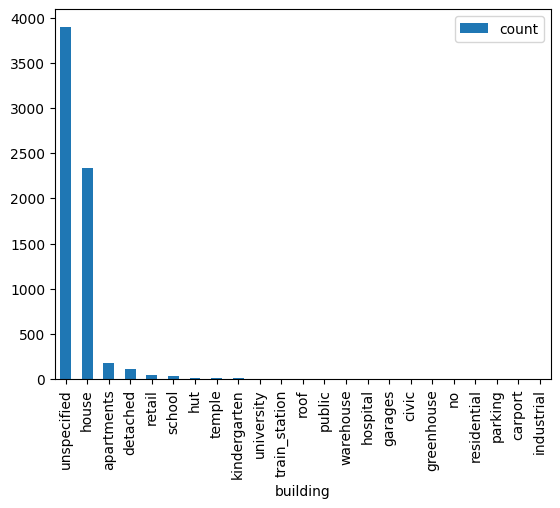

In [11]:
osm_building_counts.plot.bar(x='building');

Now output it again, but this time, only show the "Top 10."

Take the extra mile to make it pretty!

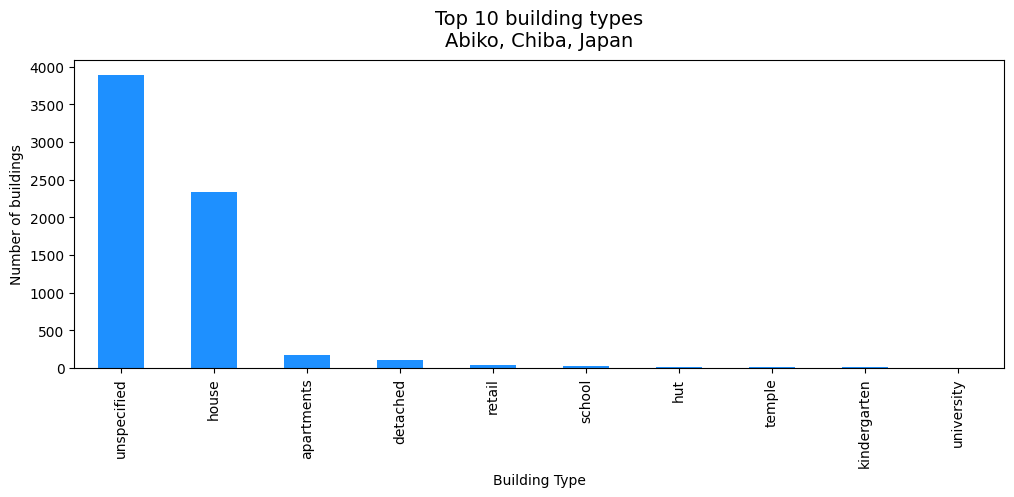

In [12]:
fig, ax = plt.subplots(figsize=(12,4))

osm_building_counts[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

### Going the extra "extra" mile

The chart that was just created uses Matplotlib, which has long been a standard in Python libraries. 

Here we introduce [plotly](https://plotly.com/python/bar-charts/) as the charting library, which comes with preconfigured thematic "[templates](https://plotly.com/python/templates/)" that allow us to generate various charts with differing design principles.

In the code cell below, you can replace "plotly_white" with any of the following values to experiment with different designs for your charts.

Choose from:
- `ggplot2`
- `seaborn`
- `simple_white`
- `plotly`,
- `plotly_white`
- `plotly_dark`
- `presentation`
- `xgridoff`,
- `ygridoff`
- `gridon`
- `none`

In [13]:
# import the themes
import plotly.io as pio
pio.templates.default = "plotly_white"

In [14]:
# bar chart
fig = px.bar(osm_building_counts.head(10),
        x='building',
        y='count',
        title="Top 10 building types in "+address, # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(osm_building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
%pip install nbformat>=4.2.0
fig.show()

zsh:1: 4.2.0 not found
Note: you may need to restart the kernel to use updated packages.


<div class="alert alert-info">

Now it's your turn! Search for an area of interest, anywhere in the world, and create a bar plot of building types.
    
Take a screengrab or save the resulting image, and paste it into this <a href="https://docs.google.com/document/d/1u1b4r6j9Av-u3LZnzE5CL_fblss7EWnEXoSBKQ_Ao9Y/edit#" target="_blank">Google Document</a>.
</div>

# Geopandas Map Plots

Let's return to the original OSM data we downloaded. Remember that the OSMnx `geometries_from_address` command returned a geodataframe of buildings. Let's plot them:

<Axes: >

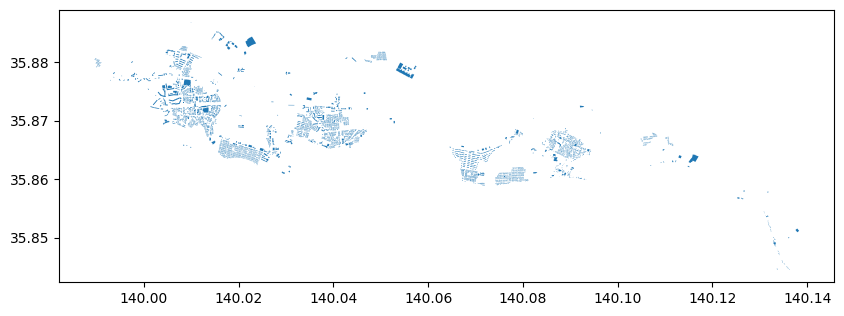

In [15]:
# plot entire dataset
osm.plot(figsize=(10,10))

<Axes: >

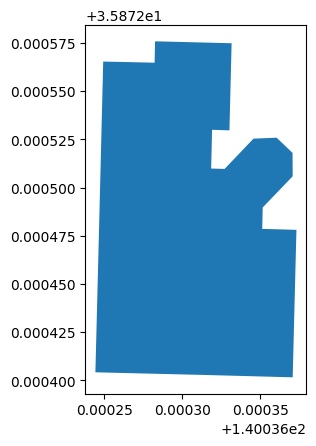

In [16]:
# plot a single random building
osm.sample(1).plot()

In [19]:
# export osm to a geojson file
osm.to_file("nhuma.geojson", driver='GeoJSON')

In [18]:
# make a map using kepler.gl
map = keplergl.KeplerGl(height=600)
map.add_data(data=osm,name='osm')
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'osm': {'index': [('way', 164267429), ('way', 164610393), ('way', 189007769), ('way', 201089057…

## Color coding buildings
Use the `column` argument to assign a column in the dataframe to color the polygons. If the column is numerical, it will poduce a numerically sequential map. If the column is categorical, it will produce a categorically colored map (a different color assigned to each distinct category).

You can use the `cmap` argument to assign a color palette. Find all the available options for `cmap` here:
- https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

In [ ]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

## Clean up: Add a title, move the legend, remove axis

### Move the legend

Moving the legend is surprisingly difficult to do. There are two key/value pairs that you need to pass using the `legend_kwds` argument. The `loc` and `bbox_to_anchor` values allow you to locate the legend outside the plot. Here is a good explanation of how that is done:

* https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132

### Add a title
Use `ax.set_title()` to add a title to the chart.

### Remove the axis

Turn off the axis with the `ax.axis('off')` statement.



In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

### Taking it to the next level

Choropleth maps are created, and left to be... as-is. Ask yourself, will your audience be able to get the most out of your graphic? In fact, choropleth maps are all too often seen as a means to an end, when in fact, they are perhaps the biggest cartographic overuse. Instead, solicit your audience through the use of binary maps, which allow the eyes to more easily detect patterns, convey visual information with greater clarity, and are frankly,  aesthically engaging.

Consider that your graph is a two-dimensional map of an urban space that shows the relationship between what something is and what it is not, built and unbuilt spaces. Using a solid black infill for certain spaces and a light gray color for other spaces mimics a historically popular design approach known as the figure-ground diagram, popularized by urban artists from the 17th century. Consider the specter of Giambattista Nolli's plan of Rome in 1748:

<img src="images/Nolli 1748.jpeg">

In more modern times, figure-ground diagrams have been used to depict urban morphology, the study of the formation of human habitats and their transformation of urban form over time. Modern urbanists such as Geoff Boeing (author of the OSMNX library used in this session) have coined the term "data-driven urban morphology" by combining big data and computation to explore urban spaces through the modeling of spatial data. The sudden and open availability of OSM data for locations all over the world have enabled practitioners to visualize urban phenomena across cities.

<img src="images/urban morphology.jpg" width=600>

Image from "[Spatial information and the legibility of urban form: Big data in urban morphology](ttps://www.sciencedirect.com/science/article/pii/S0268401219302154)," Geoff Boeing, 2021. One square mile of each city’s street network and building footprints, comparing US cities to informal settlements in the Global South.

With just a few weeks under our belts as spatial data scientists, do we dare presume to generate similar graphics of interest? Let's give it a shot.

Goal: To create a series of maps, with each map highlighting a single building type as a figure-ground diagram.

### Step 1: Calculate the map bounds of your data

In order to make sure that each map has the same extent (bounds), assign the min/max x/y's using the `total_bounds` function ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html)).

In [ ]:
# get min/max bounds of lat/lon
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

### Step 2: Create a building type list

Use the `unique()` function to find distinct building types, and put it in a python list.

In [ ]:
# get unique buiding types in a list
buildingtypes = osm['building'].unique().tolist()
buildingtypes

### Step 3: Create a loop for each buidling type

Now that we have the list of building types, we can loop through each building type and create individual maps. 

**Beware** Loops are super powerful operations in any programming language. Make sure that what you ask is *reasonable* to the computational resources available.

In [ ]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    osm.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    osm[osm['building'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(osm[osm['building']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');

## Add a basemap

Adding a basemap to a geopandas plot can be done using the contextily library. To do so, you must:

* reproject your geodataframe to Web Mercator (epsg: 3857)
* add a basemap, use the following guidelines: https://github.com/geopandas/contextily

In [ ]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

In [ ]:
import contextily as ctx
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                # source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )

In [ ]:
import keplergl

In [ ]:
# create an interactive map with kepler.gl
Nmap = keplergl.KeplerGl(height=600)
map.add_data(data=osm,name='osm')
map

# Create a function

Whew! That was a lot of work to finally get our building map for a given location. But what if you wanted to repeat this process for *multiple* locations?

Welcome to the world of functions. According to [W3Schools](https://www.w3schools.com/python/python_functions.asp), a python function is:
* A function is a block of code which only runs when it is called.
* You can pass data, known as parameters, into a function.
* A function can return data as a result.

In other words, you create a function (a block of code that does something), and it remains dormant until you call on it. For this lab, let's create a function that creates a building map based on location data that you pass into it.

In [ ]:
# let's make this function together
def your_name():    
    print('My name is Ren')

In [ ]:
# call it
your_name()

In [ ]:
# modify the function to accept arguments
def your_name(name):
    print('My name is ' + name)

In [ ]:
# call it
your_name()

In [ ]:
# call it correctly
your_name('Carolyn')

# or (does the same thing)
your_name(name='Carolyn')

In [ ]:
# add additional parameters
def your_name(firstname, lastname):
    print('My name is ' + firstname + ' ' + lastname)

In [ ]:
your_name('Erik','Felix')

In [ ]:
# provide default values
def your_name(firstname = 'Michael', lastname = 'Jordan'):
    print('My name is ' + firstname + ' ' + lastname)

In [ ]:
# call it with no arguments
your_name()

In [ ]:
# call it with one argument
your_name(firstname = 'Emma')

In [ ]:
# you can also do computations
def f_to_c(f):
    c = (f-32)*5/9 
    return c

In [ ]:
f_to_c(80)

## Create a function that generates a map based on any location

### The anatomy of the function

<img src="images/function.png">

In [ ]:
# function to create a map using open street map
def make_building_map(location):
 
    # get the data from osm
    osm = ox.geometries_from_address(location,
                                     tags={'building':True},
                                     dist=500)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(6,6))
    
    # add the map
    osm.plot(ax=ax,
                        color="black",
                        alpha=0.8,
                        )

    # add a title
    ax.set_title(location)

    # get rid of the axis
    ax.axis('off')    

In [ ]:
%%time 
# a "magic" function to display the time it took to run this cell
# run the function once
make_building_map('rome')

# Looping through it

To make the use of functions even more effective, let's create a list of addresses.

In [ ]:
address_list = ['downtown los angeles','new york','kyoto','monrovia','paris','new delhi']

In [ ]:
%%time
# run our function for every address in our list
for address in address_list:
    make_building_map(address)

# Doing other searches

For this lab, we used the tags argument: `'building':True`. This indicates a desire to download *all* buildings for the given geography. There are many other options to filter what you download from OSM. 

* https://wiki.openstreetmap.org/wiki/Map_Features

Examples calls to intake features from OSM:

```python
# for all buildings (could be a very large query)
features = ox.geometries_from_address(place, tags={'building': True})

# for specific buildings
features = ox.geometries_from_address(place, tags={'building': ['retail','industrial','commercial']})

# for amenities
features = ox.geometries_from_address(place, tags={'amenity': ['restaurant','fast_food']})

# for leisure spaces
features = ox.geometries_from_address(place, tags={'leisure': ['park']})
```

Note that when you perform a different search based on a different type of tag, **you may not get the same columns back**. You will need to adjust the code in this lab to reflect the columns that are returned. For example, a tag for "leisure" may not return "buildings", and instead, you may want to color code the map by the column "leisure."